# Foundation of Data Science (25 points)
## Homework 4

Student Name: Tekuri Sai Akhil

Student Netid: st5050

### Part 1: Critique this plan (10 points)
1\. After a few beers your CIO invited his buddy from Green Berry consulting to propose a project using data mining to improve the targeting of the new service that you have been a principal in developing. The service has been quite successful so far, being marketed over the last 6 months via your ingenious, and very inexpensive, word-of-mouth campaign. You've already garnered a pretty large customer base without any targeting, and you've been seeing this success as your best stepping stone to bigger and better things in the firm.

After some reflection, you've decided that your best course of action is to play a key role in ensuring the success of this data mining project as well. You agree with your CIO's statement in a meeting with Green Berry, that accurate targeting might cost-effectively expand your audience substantially to consumers that word-of-mouth would not reach. You accept that what Green Berry says about the characteristics of your service is accurate.

Based on what we have covered in class, identify the four most serious weaknesses/flaws in this abridged version of Green Berry's proposal, and suggest how to ameliorate them.  Your answer should be 4 bullet points, each comprising 2-4 sentences: 1-2 sentences stating each weakness, and 1-2 sentences suggesting a better alternative.  Maximal credit will be given when the 4 points are as independent as possible.


```
--- -------------------------------------------------------------------------- ---
                            Targeted Audience Expansion             
                      Prepared by Green Berry Consulting, Inc.

Your problem is to expand the audience of your new service.  We (Green Berry) have a
large database of consumers who can be targeted.  We will build a predictive model
to estimate which of these consumers are the most likely to adopt the product, and
then target them with the special offer you have designed.

More specifically, we will build a decision tree (DT) model to predict adop-
tion of the service by a consumer, based on the data on your current customers of
this service.  The model will be based on their demographics and their usage of
the service. We believe that DT is the best choice of method be-
cause it is a tried-and-true modeling technique, and we can easily
interpret the model to infer whether the attributes make sense. We will apply the model to our large
database of consumers, and select out those who have not yet subscribed and whom
the DT model predicts to be likely to subscribe.  To these we will send
the targeted offer. As this is a fixed-profit-per-customer service, this also
will in effect rank them by expected profit.
--- -------------------------------------------------------------------------- ---
```

1) Using only decision tree (DT) model is not a good idea because decission tree are prone to overfitting and may not generalize for all customers. One thing we can do is to use ensemble methods to model the data to decrease varience and increase accuracy and overall reducing overfitting.

2) Since the marketing till now are based on word-of-mouth campaign the current customers of this service may be local to the place of the company. So the sample space of train (demographics of the current customers) may be completely different from the sample space that they are trying to predict on (large database of consumers in Green Berry's databse). So this DT may not be a accurate model for predicting consumers are the most likely to adopt the product. We can first do analysis about the demographics of the  the customers and segment the customer based on demographics to build better predictions and to overcome this assumption.
 
3) The proposal doesn't mention anything about the validation of the model. Without proper validation of the model, we can't expect targeted offer to work. We may need to perform some type of validation like cross-validation or evaluation performance of new data to have confidence in the model to predict consumers that are most likely to  subscribe.

4) The proposal didn't address any privacy issue or concerns with the current customers data being used. This may lead to lossing current customers beacuse of lack of trust in this new services. To avoid it make clear agreement with the customer to choose wheather we can use the data that they provided for internal use. This will minimize risk of negetive effects.

### Part 2: Working with Time Series (15 points + option for 4 bonus points)

Here we will analyze a timeseries of number of Yellow Fever cases from a specific Asian country by year. The data is from 1700 – 2008 (use file cases.csv for this section).

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson

1\. Load the timeseries data set, and prepare the dataset by converting the variables to date-time format (hint: use date tools and the library statsmodels). (1 point)

In [2]:
#write your code here

#Converting the YEAR to date-time format
df = pd.read_csv('data/cases.csv')
df["YEAR"] = pd.to_datetime(df['YEAR'],format="%Y")

2\. Plot the autocorrelation function (ACF) for the cases timeseries (hint: use statsmodels plot_acf for that). (2 points)

To learn more about how to interpret these graphs, you may find this useful: https://medium.com/analytics-vidhya/interpreting-acf-or-auto-correlation-plot-d12e9051cd14

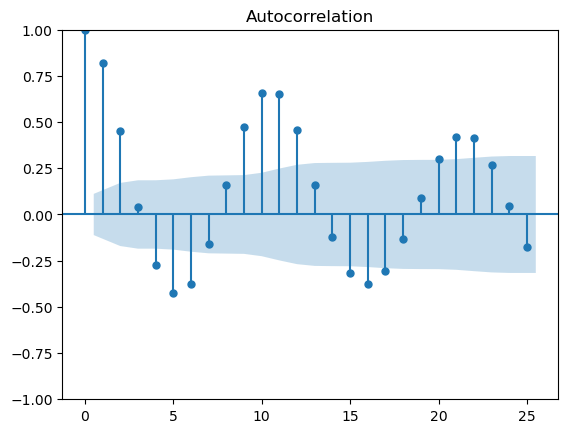

In [3]:
#write your code here
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

#plotting autocorrelation
plot_acf(df["YFCASES"])
plt.show()

3\. An approach to assess the presence of a significant autocorrelation in the data is to use the Durbin-Waton (DW) statistic. The value of the DW statistic is close to 2 if the errors are uncorrelated. What is the DW for our data? Does this suggest that the data has a relatively high or a relatively low autocorrelation? (2 point)

In [4]:
#write your code here

#Durbin-Waton (DW) statistic
DW_stat = durbin_watson(df["YFCASES"], axis=0)
print("DW_stat = " +str(DW_stat))

DW_stat = 0.13952892659903304


In [5]:
print("1) DW statistic of out data is 0.13952892659903304")
print("2) This suggests that our data has relatively high autocorrelation")

1) DW statistic of out data is 0.13952892659903304
2) This suggests that our data has relatively high autocorrelation


4. Now we will make a forecast on this time series. What time horizon will you use and how do you pick it? (2 points)

1) I am using time horizon of 1, i.e I am making the forecase one year into the future
2) We can see that in the plot of YFCASES cases the graph goes up and down alternatively but the value of the ups and downs are different or not periodic
3) So It makes sense to use time horizon as 1 rather that some other value because we can't see any periodicity


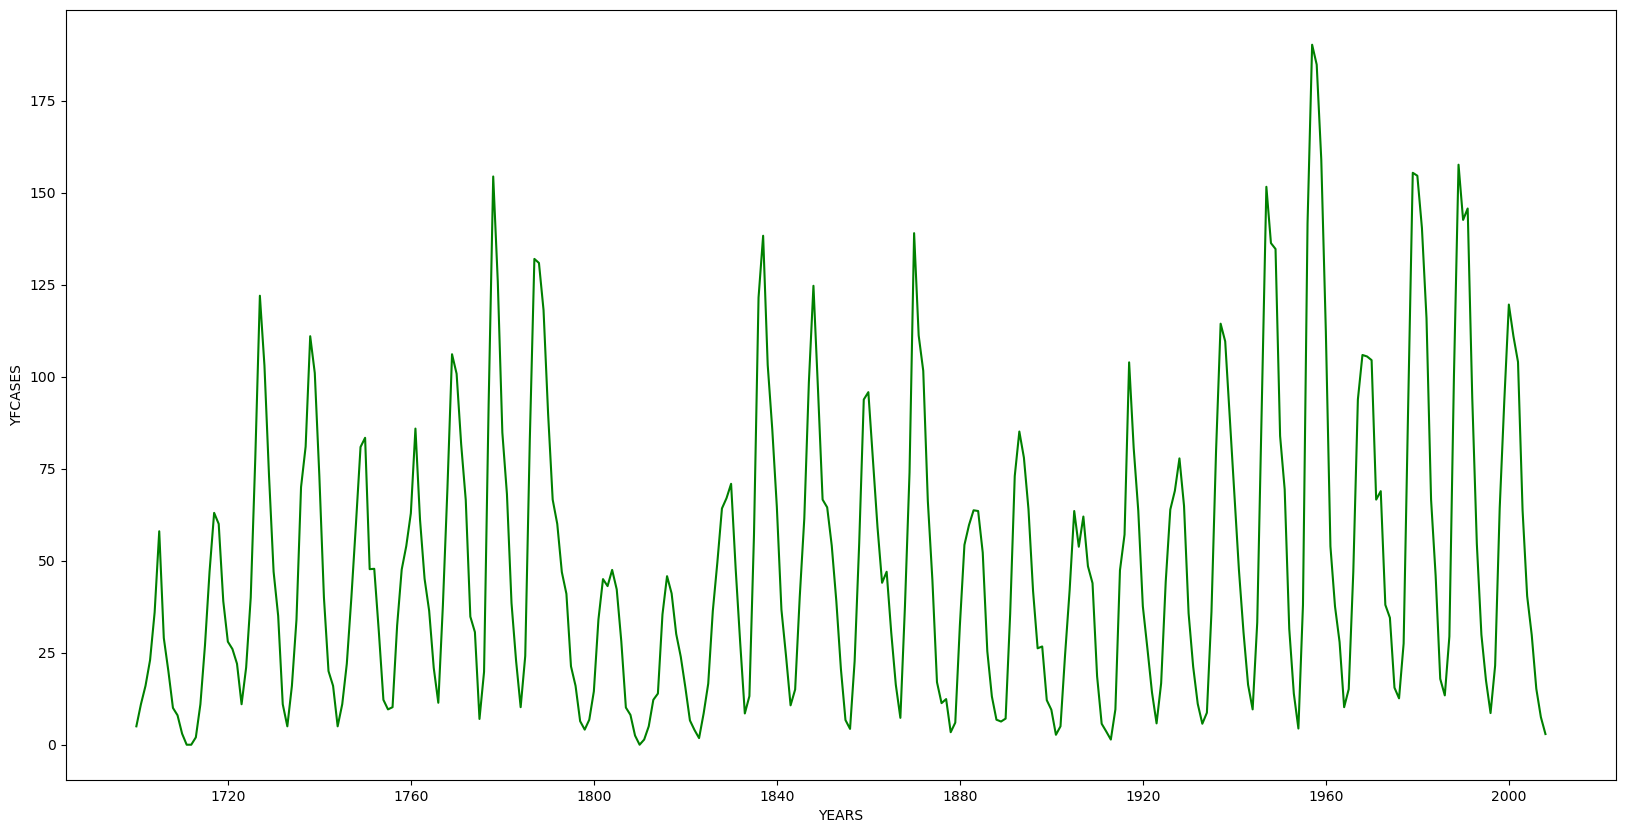

In [6]:
#place your answer here
# Plotting the YEAR v/s YFCASES 

plt.figure(figsize=(20,10))
plt.plot(df["YEAR"],df["YFCASES"], c='green',label='actual')
plt.xlabel("YEARS")
plt.ylabel("YFCASES")

print("1) I am using time horizon of 1, i.e I am making the forecase one year into the future")
print("2) We can see that in the plot of YFCASES cases the graph goes up and down alternatively but the value of the ups and downs are different or not periodic")
print("3) So It makes sense to use time horizon as 1 rather that some other value because we can't see any periodicity")

5. Now use a simple moving average. Show plots for a forecast for your horizon with a series of different averaging windows, to show how you can pick one (3 points)

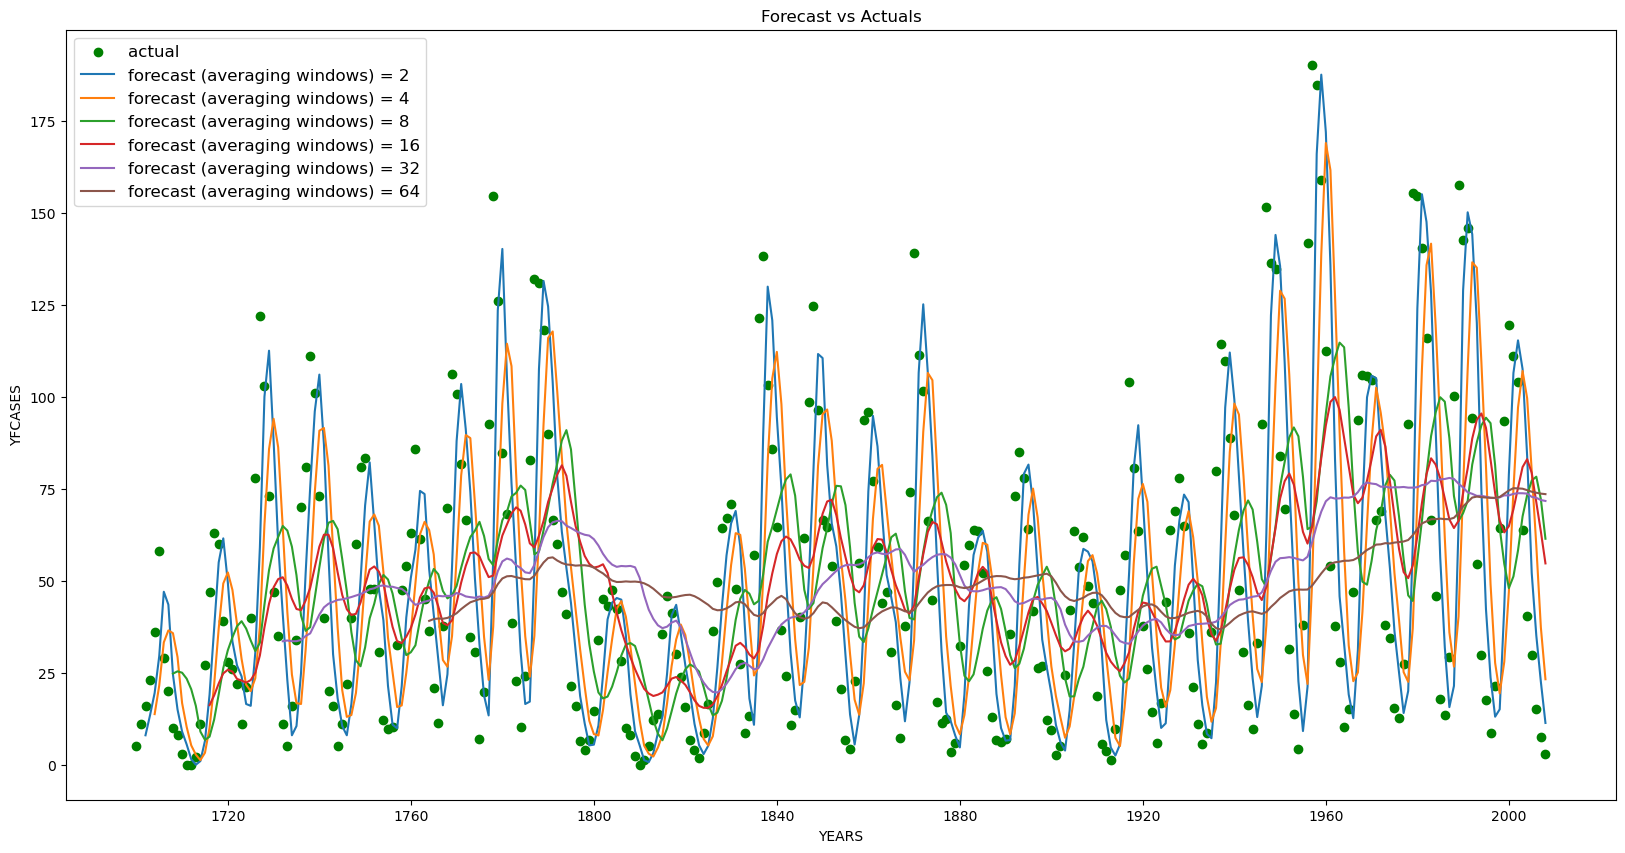

In [7]:
#place your answer here
windows = [2,4,8,16,32,64]

plt.figure(figsize=(20,10))
plt.scatter(df["YEAR"],df["YFCASES"], c='green',label='actual')
#plt.plot(df["YFCASES"], label='actual')

MFEs = []
MADs = []
TSs = []

#Performaing moving average with window size = [2,4,8,16,32,64]
for window in windows:
    
    #Calculating moving average
    YFCASES_Forecast = df["YFCASES"].rolling(window=window,closed='left').mean()
    
    #Error measures
    MFEs.append(np.mean(df["YFCASES"] - YFCASES_Forecast))
    MADs.append(np.mean(np.abs(df["YFCASES"] - YFCASES_Forecast)))
    TSs.append(np.sum(df["YFCASES"] - YFCASES_Forecast)/np.mean(np.abs(df["YFCASES"] - YFCASES_Forecast)))
    
    #Plot
    plt.plot(df["YEAR"],YFCASES_Forecast, label='forecast (averaging windows) = ' +str(window))

plt.xlabel("YEARS")
plt.ylabel("YFCASES")
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=12)
plt.show()

6. Will a weighted moving average be helpful here? (2 points)

1) Yes the weighted moving average will defneately help here because from above we see that as window length increases, the forcast became worst
2) Therfore weighted moving average with more wwight for near samples will help
3) Here I've used parameter alpha(=0.8) to define the weights (ith weight = (1-alpha)^i)/sum_of_all_weights


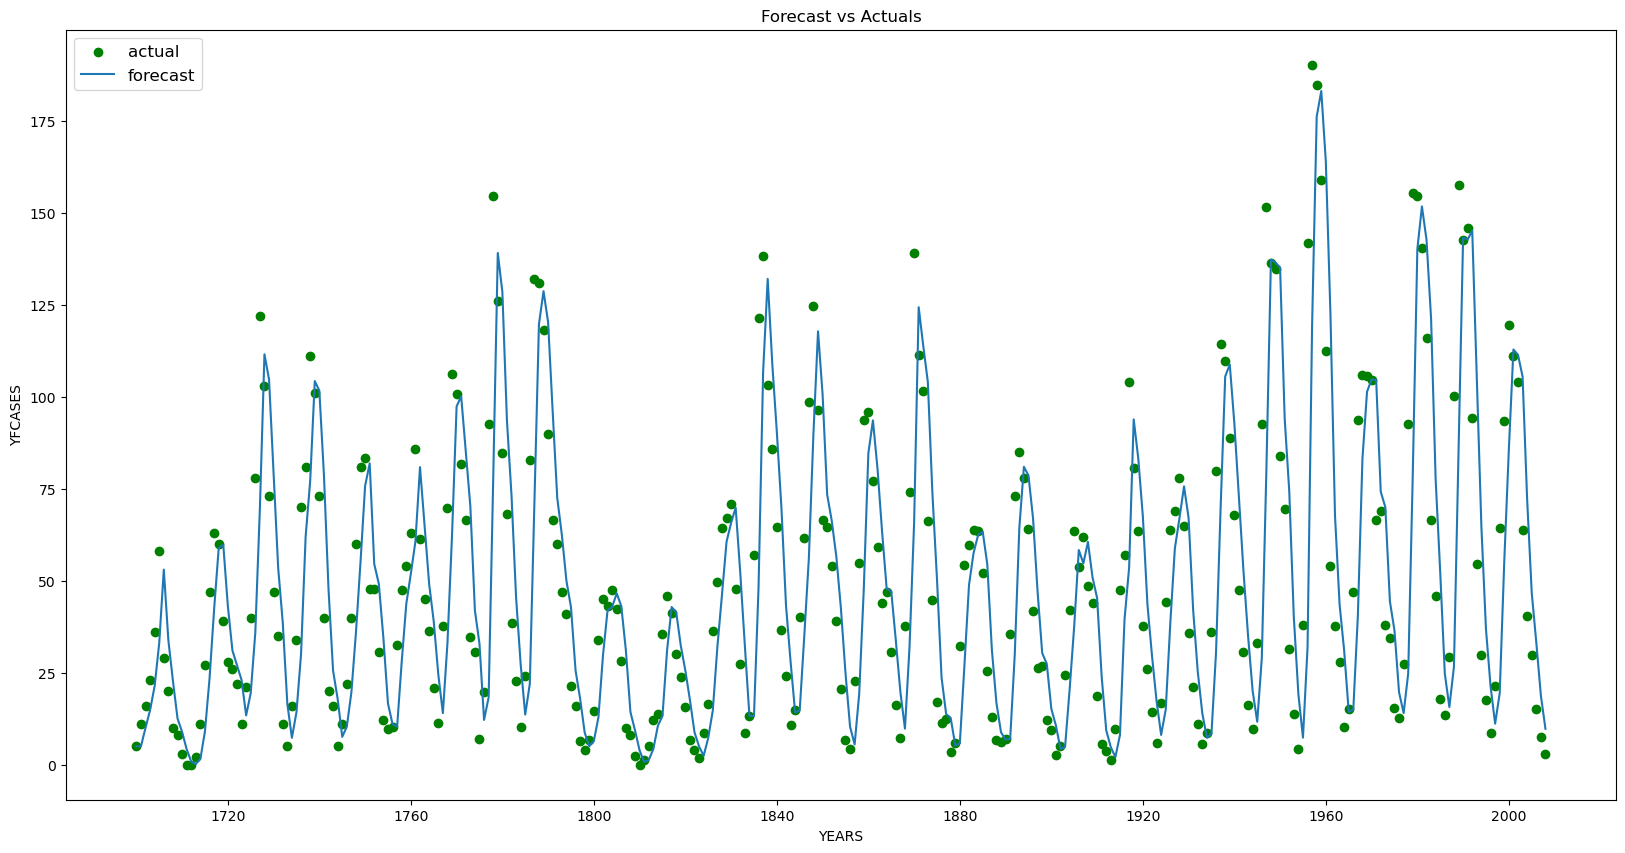

In [8]:
#place your answer here
print("1) Yes the weighted moving average will defneately help here because from above we see that as window length increases, the forcast became worst")
print("2) Therfore weighted moving average with more wwight for near samples will help")
print("3) Here I've used parameter alpha(=0.8) to define the weights (ith weight = (1-alpha)^i)/sum_of_all_weights")


plt.figure(figsize=(20,10))
plt.scatter(df["YEAR"],df["YFCASES"], c='green',label='actual')

n = df["YFCASES"].shape[0]
YFCASES_Forecast = [df["YFCASES"][0]]

#Performaing weighted moving average with alpha = 0.8
for i in range(1,n):
    YFCASES_Forecast.append(df["YFCASES"][:i].ewm(alpha = 0.8).mean()[i-1])
    

YFCASES_Forecast = np.array(YFCASES_Forecast)

#Plot
plt.plot(df["YEAR"], YFCASES_Forecast, label='forecast')
    
#Error measures
MFE_weighted = np.mean(df["YFCASES"] - YFCASES_Forecast)
MAD_weighted = np.mean(np.abs(df["YFCASES"] - YFCASES_Forecast))
TS_weighted = np.sum(df["YFCASES"] - YFCASES_Forecast)/np.mean(np.abs(df["YFCASES"] - YFCASES_Forecast))

plt.xlabel("YEARS")
plt.ylabel("YFCASES")
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=12)
plt.show()

7. Evaluate your selected moving average with an appropriate evaluation metric. What do you use and what does it show you? (3 points)

In [9]:
#place your answer here
windows = [2,4,8,16,32,64]

#Printing error measures
for i, window in enumerate(windows):
    print("For window = "+str(window))
    print("     MFE = "+str(MFEs[i]))
    print("     MAD = "+str(MADs[i]))
    print("     TS = "+str(TSs[i]))
    

print("For Weighted moving average")
print("     MFE = "+str(MFE_weighted))
print("     MAD = "+str(MAD_weighted))
print("     TS = "+str(TS_weighted))

print("\n1) I've used Mean Forecast Error(MFE) and Mean Absolute Deviation(MAD) as evaluation mertics")
print("2) We can see that all window lengths the MFE values are low and MAD values are high")
print("3) This indicated that the model somethimes it's overforcasting and sometimes if's underforcasting. On average we are getting low MFE values but MAD values are still high")
print("4) As window size increases the errors increases")
print("5) The weighted moving average performed better than the simple moving average")

For window = 2
     MFE = -0.022312703583059788
     MAD = 25.01188925081433
     TS = -0.27386975575131073
For window = 4
     MFE = -0.059590163934419835
     MAD = 35.7977868852459
     TS = -0.5077129504754077
For window = 8
     MFE = -0.029235880398670852
     MAD = 37.85847176079735
     TS = -0.23244467065657873
For window = 16
     MFE = 0.9390145051194538
     MAD = 33.31793941979522
     TS = 8.257751073181193
For window = 32
     MFE = 1.061281588447654
     MAD = 33.43919223826715
     TS = 8.791330780519903
For window = 64
     MFE = 3.0497066326530606
     MAD = 34.341007653061226
     TS = 21.757606315707367
For Weighted moving average
     MFE = -0.003972588532185624
     MAD = 20.755284874122047
     TS = -0.05914300207827346

1) I've used Mean Forecast Error(MFE) and Mean Absolute Deviation(MAD) as evaluation mertics
2) We can see that all window lengths the MFE values are low and MAD values are high
3) This indicated that the model somethimes it's overforcasting and

8. (Bonus). You can also investigate if removing the trend and seasonal components of the time series help with forecasting. First remove those (hint, use differencing), and implement any forecasting method you like. Does it improve over the moving average? (up to 4 bonus points).

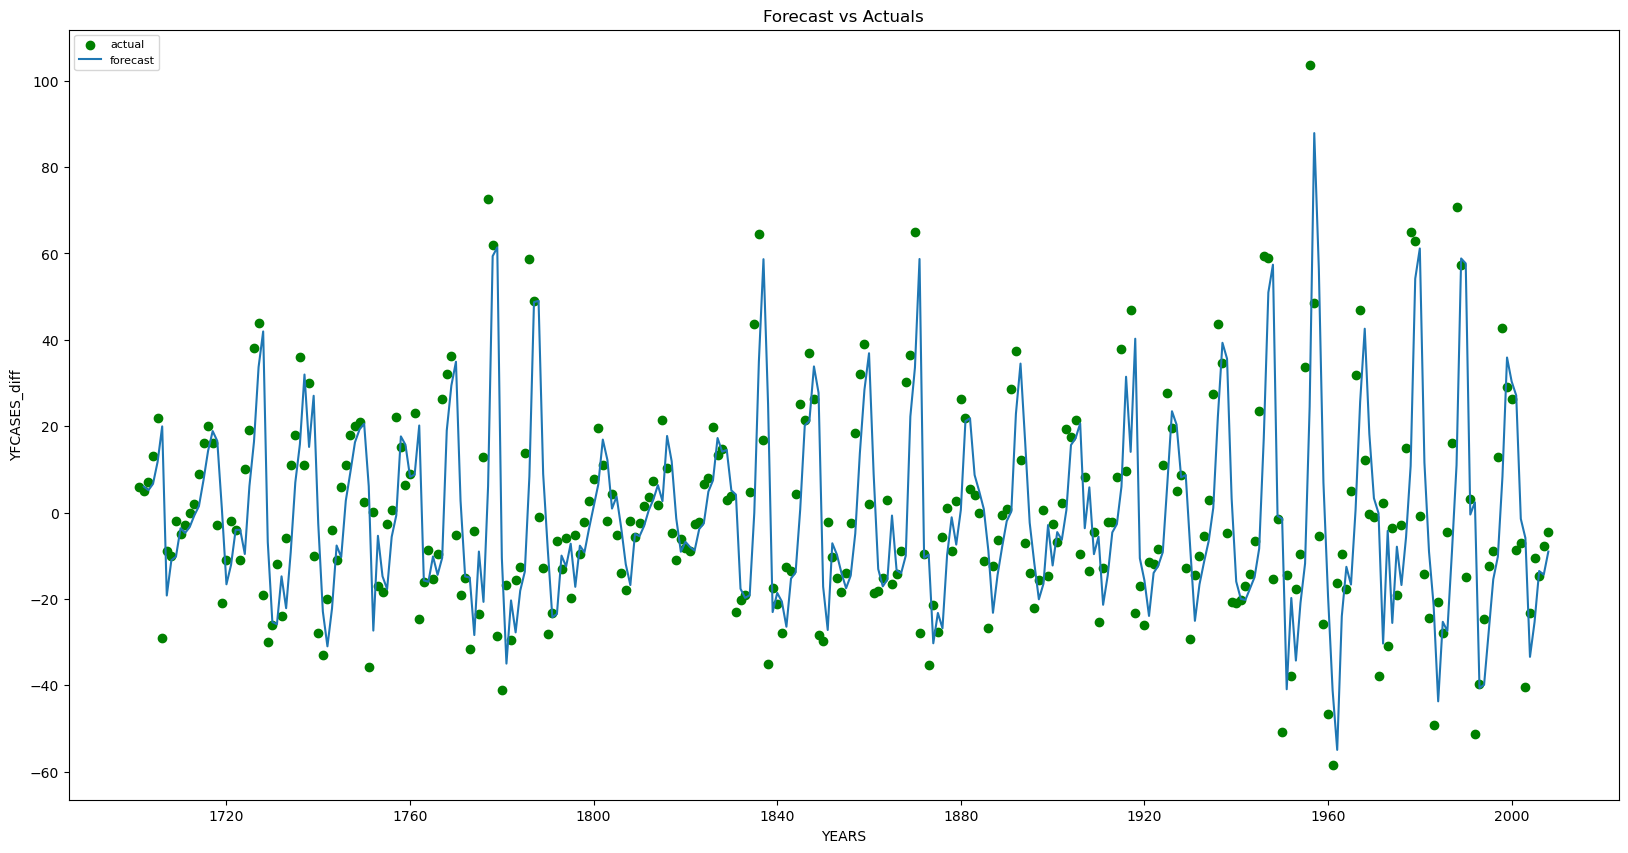

In [10]:
#place your code here

#Removing trend and seasonal components
df["diff"] = df["YFCASES"].diff()

plt.figure(figsize=(20,10))
plt.scatter(df["YEAR"],df["diff"], c='green',label='actual')

n = df["diff"].shape[0]

#Performaing weighted moving average with alpha = 0.8
YFCASES_Forecast = [df["diff"][0]]
for i in range(1,n):
    YFCASES_Forecast.append(df["diff"][:i].ewm(alpha = 0.8).mean()[i-1])
    
#Plot
YFCASES_Forecast = np.array(YFCASES_Forecast)
plt.plot(df["YEAR"],YFCASES_Forecast, label='forecast')

#Error measures
MFE_weighted_diff = np.mean(df["diff"] - YFCASES_Forecast)
MAD_weighted_diff = np.mean(np.abs(df["diff"] - YFCASES_Forecast))
TS_weighted_diff = np.sum(df["diff"] - YFCASES_Forecast)/np.mean(np.abs(df["diff"] - YFCASES_Forecast))

plt.xlabel("YEARS")
plt.ylabel("YFCASES_diff")
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [11]:
print("MFE = "+str(MFE_weighted_diff))
print("MAD = "+str(MAD_weighted_diff))
print("TS = "+str(TS_weighted_diff))
print("We can see the improvement in the MAD value in this case comparted to the above case")
print("We can say that there is some improvment compared to without removing trend and seasonal components")

MFE = -0.04671999765848342
MAD = 16.60308008003353
TS = -0.8638782209093244
We can see the improvement in the MAD value in this case comparted to the above case
We can say that there is some improvment compared to without removing trend and seasonal components
